data reading and exploration

In [1]:
import pandas as pd

In [42]:
df = pd.read_csv('/content/railway.csv')
df.head(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,NaN,No
7,febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,00:30:00,00:30:00,On Time,NaN,No
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
9,a8cedba7-1923-459d-b046,2023-12-31,03:05:52,Online,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,01:30:00,02:30:00,02:30:00,On Time,NaN,No


Data Exploration

In [27]:
df.shape

(31653, 18)

In [28]:
df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [78]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

Data Cleaning
Cheking for null values

In [43]:
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [31]:
df["Railcard"].unique()

array(['Adult', nan, 'Disabled', 'Senior'], dtype=object)

In [79]:
df["Railcard"].nunique()

3

In [44]:
df["Railcard"].fillna(method="ffill",inplace=True)
df["Actual Arrival Time"].fillna(method="bfill",inplace=True)
df["Reason for Delay"].fillna("Not Delayed",inplace=True)

In [45]:
df.isnull().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [46]:
df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,Not Delayed,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Adult,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,Not Delayed,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Adult,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,Not Delayed,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Adult,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,Not Delayed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,Senior,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,Not Delayed,No
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,Senior,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,Not Delayed,No
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,Senior,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,Not Delayed,No
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,Senior,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,Not Delayed,No


Scatter

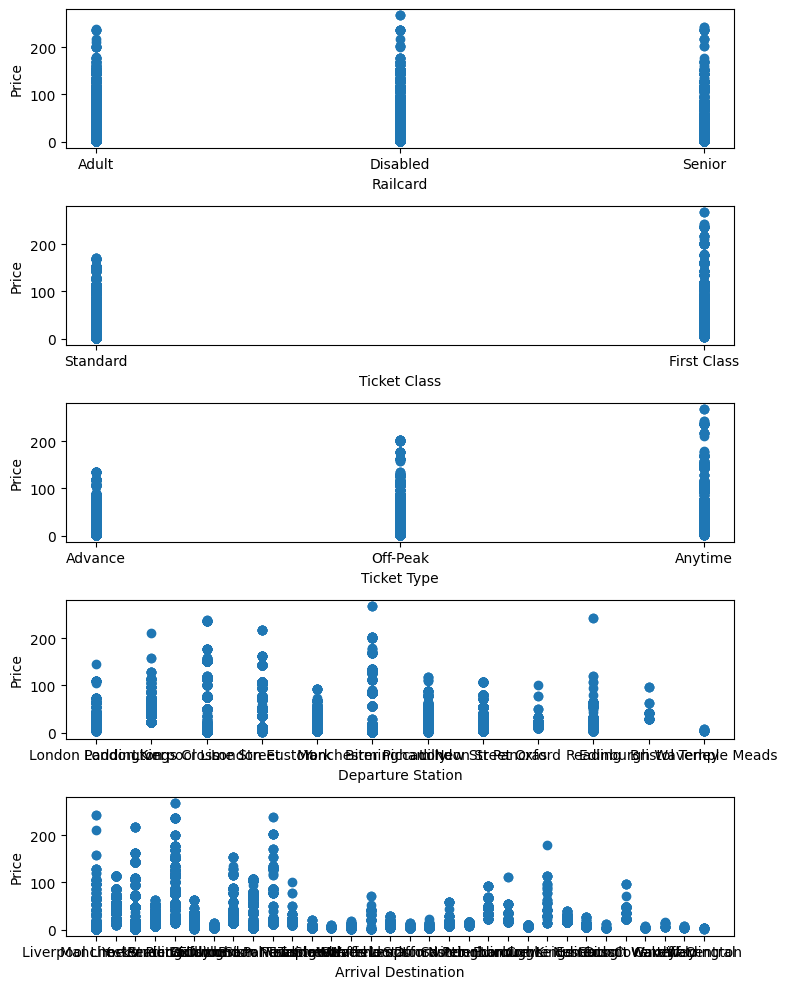

In [53]:
import matplotlib.pyplot as plt

features = df[["Railcard","Ticket Class","Ticket Type","Departure Station","Arrival Destination"]]
target = df["Price"]

fig, axs = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(8, 10))

for i, feature in enumerate(features.columns):
    axs[i].scatter(features[feature], target)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Price")

plt.tight_layout()
plt.show()

BOX PLOTING

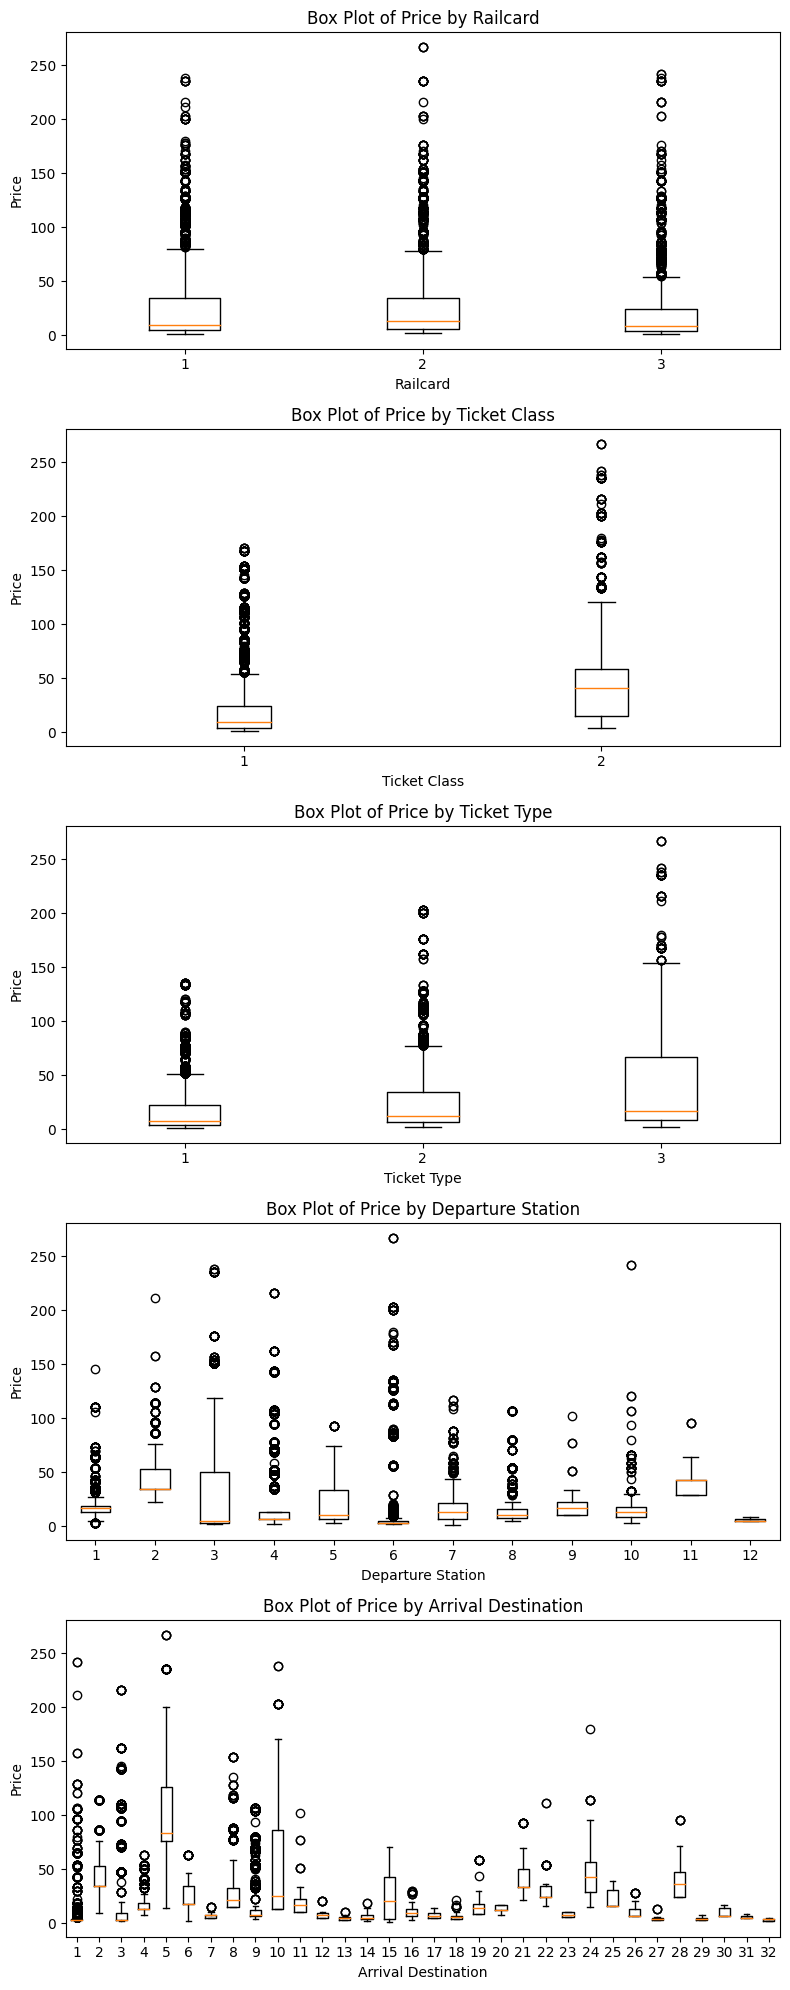

In [80]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, axs = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(8, 20))

# Loop through each feature column
for i, col in enumerate(features.columns):
    # Create a box plot for each feature against the target variable
    axs[i].boxplot([df.loc[df[col] == cat, 'Price'] for cat in df[col].unique()])
    axs[i].set_title(f'Box Plot of Price by {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()

In [63]:
features = df[["Railcard","Ticket Class","Ticket Type","Departure Station","Arrival Destination"]]
target = df["Price"]

Histogram

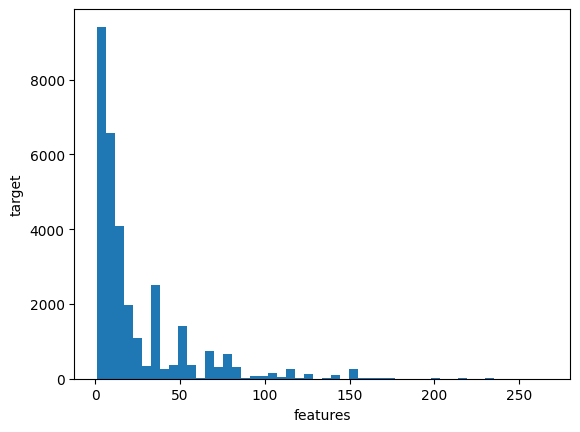

In [55]:
import matplotlib.pyplot as plt
plt.hist(target, bins=50)
plt.xlabel("features")
plt.ylabel("target")
plt.show()

Converting strings into integer values


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Railcard"] = le.fit_transform(df["Railcard"])
df["Ticket Class"] = le.fit_transform(df["Ticket Class"])
df["Ticket Type"] = le.fit_transform(df["Ticket Type"])
df["Departure Station"] = le.fit_transform(df["Departure Station"])
df["Arrival Destination"] = le.fit_transform(df["Arrival Destination"])

array([0, 2, 1])

In [81]:
df['Railcard'].unique()

array([0, 1, 2])

In [82]:
df['Ticket Class'].unique()

array([1, 0])

In [83]:
df['Departure Station'].unique()

array([ 6,  5,  3,  4, 11,  8,  0,  7,  9, 10,  2,  1])

In [85]:
df['Arrival Destination'].unique()

array([12, 31, 18, 23, 13, 21,  7, 16,  0, 15,  1, 27, 17, 24, 30, 10, 25,
        6, 26, 19, 22,  8,  4, 14, 11, 20,  5,  9,  3, 28,  2, 29])

In [86]:
df['Ticket Type'].unique()

array([0, 2, 1])

In [67]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(features,target)

LinearRegression()

In [69]:
features

,Railcard,Ticket Class,Ticket Type,Departure Station,Arrival Destination
0,0,1,0,6,12
1,0,1,0,5,31
2,0,1,0,3,18
3,0,1,0,6,23
4,0,1,0,3,13
...,...,...,...,...,...
31648,2,1,2,8,12
31649,2,1,2,4,0
31650,2,1,2,8,12
31651,2,1,2,4,0


In [87]:
target

0        43
1        23
2         3
3        13
4        76
         ..
31648     4
31649    10
31650     4
31651    10
31652     3
Name: Price, Length: 31653, dtype: int64

In [89]:
test_Sample = [[0,1,0,6,23]]
result = model.predict(test_Sample)
print(result)

[22.81264164]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(target, model.predict(features))
r2 = r2_score(target, model.predict(features))
mae = mean_absolute_error(target, model.predict(features))
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)

MSE: 750.0454482244611
R2: 0.16645805618536658
MAE: 17.410077033740023
